In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

In [93]:
data = pd.read_csv('weight-height.csv')

In [94]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [95]:
scale = MinMaxScaler()
scale = StandardScaler()

scale.fit(data[['Height', 'Weight']])
X = pd.DataFrame(scale.transform(data[['Height', 'Weight']]), columns=['Height', 'Weight'])


In [96]:
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1})

In [97]:
y = data['Gender']

In [98]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=2)

In [99]:
test_X

,Height,Weight
7878,-1.377448,-1.748202
3224,-0.872062,0.038940
1919,1.049340,1.058415
4432,0.625873,1.188568
4835,0.184390,0.657646
...,...,...
6772,-0.969269,-0.772758
4048,-0.406062,-0.438443
623,1.484830,1.290282
9952,-0.869005,-0.854404


In [100]:
model = KNeighborsClassifier(n_neighbors=11,algorithm = 'kd_tree')

In [101]:
model.fit(train_X,train_y)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=11)

In [102]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [103]:
model.predict(test_X)

array([1, 0, 0, ..., 0, 1, 0])

In [104]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [105]:
print("Train Result")
print(confusion_matrix(train_y, train_pred))
print(accuracy_score(train_y, train_pred))
print(classification_report(train_y, train_pred))

Train Result
[[3226  270]
 [ 277 3227]]
0.9218571428571428
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3496
           1       0.92      0.92      0.92      3504

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [106]:
print("Test Result")
print(confusion_matrix(test_y, test_pred))
print(accuracy_score(test_y, test_pred))
print(classification_report(test_y, test_pred))

Test Result
[[1394  110]
 [ 134 1362]]
0.9186666666666666
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1504
           1       0.93      0.91      0.92      1496

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [107]:
res = []
for i in tqdm(range(1,50)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    test_pred = model.predict(test_X)
    res.append(1-accuracy_score(test_y, test_pred))
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.13it/s]


ELBOW CHART


<AxesSubplot:>

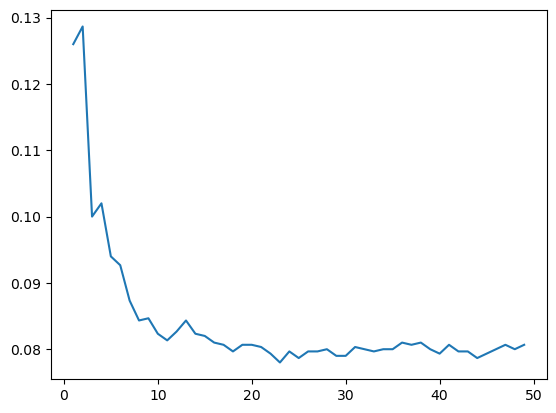

In [108]:
print("ELBOW CHART")
pd.Series(res, index = range(1,50)).plot()

In [109]:
res

[0.126,
 0.1286666666666667,
 0.09999999999999998,
 0.10199999999999998,
 0.09399999999999997,
 0.09266666666666667,
 0.08733333333333337,
 0.08433333333333337,
 0.08466666666666667,
 0.08233333333333337,
 0.08133333333333337,
 0.08266666666666667,
 0.08433333333333337,
 0.08233333333333337,
 0.08199999999999996,
 0.08099999999999996,
 0.08066666666666666,
 0.07966666666666666,
 0.08066666666666666,
 0.08066666666666666,
 0.08033333333333337,
 0.07933333333333337,
 0.07799999999999996,
 0.07966666666666666,
 0.07866666666666666,
 0.07966666666666666,
 0.07966666666666666,
 0.07999999999999996,
 0.07899999999999996,
 0.07899999999999996,
 0.08033333333333337,
 0.07999999999999996,
 0.07966666666666666,
 0.07999999999999996,
 0.07999999999999996,
 0.08099999999999996,
 0.08066666666666666,
 0.08099999999999996,
 0.07999999999999996,
 0.07933333333333337,
 0.08066666666666666,
 0.07966666666666666,
 0.07966666666666666,
 0.07866666666666666,
 0.07933333333333337,
 0.07999999999999996,
 0.